<a href="https://colab.research.google.com/github/schase15/DS-Unit-2-Kaggle-Challenge/blob/master/module1-decision-trees/Steven_Chase_LS_DS_221_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

# Decision Trees

## Assignment
- [ ] [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website. You will be given the URL in Slack. Go to the Rules page. Accept the rules of the competition. Notice that the Rules page also has instructions for the Submission process. The Data page has feature definitions.
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Begin with baselines for classification.
- [ ] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [ ] Get your validation accuracy score.
- [ ] Get and plot your feature importances.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this classification problem, you may want to use the parameter `logistic=True`, but it can be slow.

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```


In [1]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

  Using cached https://files.pythonhosted.org/packages/52/3f/f6a428599e0d4497e1595030965b5ba455fd8ade6e977e3c819973c4b41d/pandas-0.25.3-cp36-cp36m-manylinux1_x86_64.whl
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 0.25.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.21.0, but you'll have requests 2.22.0 which is incompatible.
  Found existing installation: pandas 0.25.0
    Uninstalling pandas-0.25.0:
      Successfully uninstalled pandas-0.25.0


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [3]:
# Check Pandas Profiling version
import pandas_profiling
pandas_profiling.__version__

'2.5.0'

In [4]:
# Pands Profiling wasn't working because its an older model
!pip install pandas==0.25

  Using cached https://files.pythonhosted.org/packages/1d/9a/7eb9952f4b4d73fbd75ad1d5d6112f407e695957444cb695cbb3cdab918a/pandas-0.25.0-cp36-cp36m-manylinux1_x86_64.whl
ERROR: visions 0.2.2 has requirement pandas>=0.25.3, but you'll have pandas 0.25.0 which is incompatible.
ERROR: pandas-profiling 2.5.0 has requirement pandas==0.25.3, but you'll have pandas 0.25.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 0.25.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.21.0, but you'll have requests 2.22.0 which is incompatible.
  Found existing installation: pandas 0.25.3
    Uninstalling pandas-0.25.3:
      Successfully uninstalled pandas-0.25.3


In [5]:
# Old code for Pandas Profiling version 2.3
# It can be very slow with medium & large datasets.
# These parameters will make it faster.

# profile = train.profile_report(
#     check_correlation_pearson=False,
#     correlations={
#         'pearson': False,
#         'spearman': False,
#         'kendall': False,
#         'phi_k': False,
#         'cramers': False,
#         'recoded': False,
#     },
#     plot={'histogram': {'bayesian_blocks_bins': False}},
# )
#

# New code for Pandas Profiling version 2.4
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

profile

In [6]:
# Split train into train & val
# 80/20 split
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['status_group'], random_state=42)

train.shape, val.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

In [7]:
# Baseline - Majority category 54%

train['status_group'].value_counts(normalize=True)

functional                 0.543077
non functional             0.384238
functional needs repair    0.072685
Name: status_group, dtype: float64

## First iteration of model

In [0]:
# Select target and features
# First iteration, model with basic features as follows:
# (basin, region, extraction_type_class, payment_type and scheme_management)

target= 'status_group'
features= ['basin', 'region', 'scheme_management', 'extraction_type_class', 'payment']

# Split into train and validate target vector and feature matrices
X_train= train[features]
y_train= train[target]

X_val= val[features]
y_val= val[target]

# Set test feature matrix
X_test= test[features]

In [19]:
# Create a pipeline to one-hot encode, impute (scheme_management is missing 5% of values),
# and fit a decision tree classifier

# Imports
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

# Define pipeline
pipeline= make_pipeline(
    ce.OneHotEncoder(use_cat_names= True),
    SimpleImputer(strategy= 'most_frequent'),
    DecisionTreeClassifier(random_state= 42)
)

# Fit on training data
pipeline.fit(X_train, y_train)

# Validation score
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Validation Accuracy:', pipeline.score(X_val, y_val))

Train Accuracy: 0.7039141414141414
Validation Accuracy: 0.6838383838383838


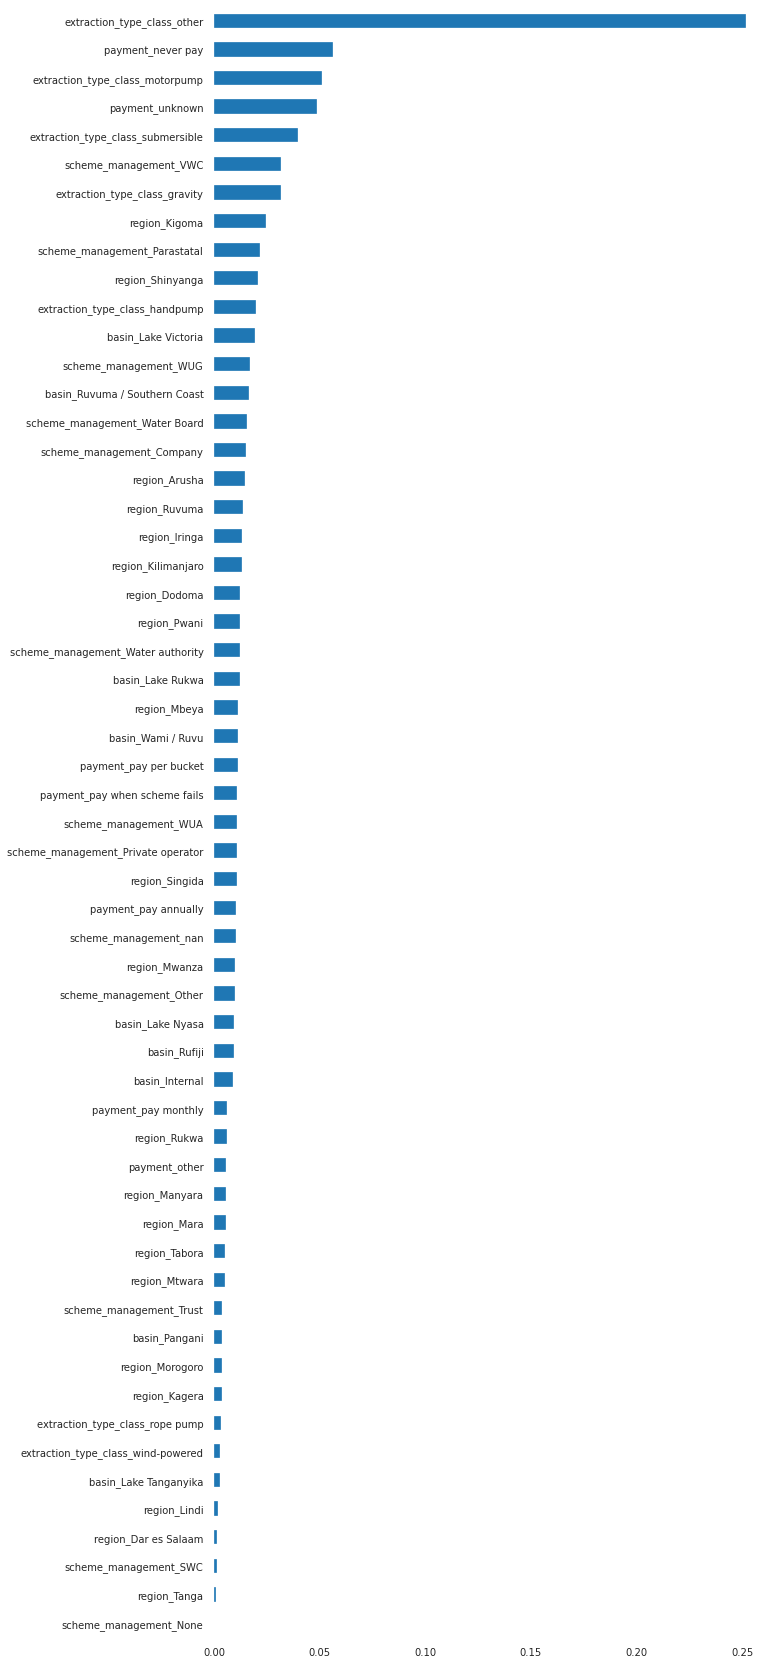

In [22]:
# Plot feature importance
%matplotlib inline
import matplotlib.pyplot as plt

model = pipeline.named_steps['decisiontreeclassifier']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns
importances = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh()

In [29]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
43360,72938,0.0,2011-07-27,NaN,0,NaN,33.542898,-9.174777,Kwa Mzee Noa,0,Lake Nyasa,Mpandapanda,Mbeya,12,4,Rungwe,Kiwira,0,True,GeoData Consultants Ltd,VWC,K,NaN,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
7263,65358,500.0,2011-03-23,Rc Church,2049,ACRA,34.665760,-9.308548,Kwa Yasinta Ng'Ande,0,Rufiji,Kitichi,Iringa,11,4,Njombe,Imalinyi,175,True,GeoData Consultants Ltd,WUA,Tove Mtwango gravity Scheme,True,2008,gravity,gravity,gravity,wua,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2486,469,25.0,2011-03-07,Donor,290,Do,38.238568,-6.179919,Kwasungwini,0,Wami / Ruvu,Kwedigongo,Pwani,6,1,Bagamoyo,Mbwewe,2300,True,GeoData Consultants Ltd,VWC,NaN,False,2010,india mark ii,india mark ii,handpump,vwc,user-group,pay per bucket,per bucket,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
313,1298,0.0,2011-07-31,Government Of Tanzania,0,DWE,30.716727,-1.289055,Kwajovin 2,0,Lake Victoria,Kihanga,Kagera,18,1,Karagwe,Isingiro,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional
52726,27001,0.0,2011-03-10,Water,0,Gove,35.389331,-6.399942,Chama,0,Internal,Mtakuj,Dodoma,1,6,Bahi,Nondwa,0,True,GeoData Consultants Ltd,VWC,Zeje,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional


## Second iteration of model

In [0]:
# Select features

# Drop id and target

# Drop features that are repetitive: (region_code is the same as region, scheme_name 
# is included in scheme_management, extraction type has three basically repeated columns, 
# management and management_group is the same as scheme_management, payment and 
# payment_type are the exact same, quantity and quantity_group are the same, 
# source and source_type are the same, waterpoint_type and waterpoint_type_group are the same)

# Drop high cardinality columns discovered below

# Drop num_private. It is 98.8% zero. There is no description of what it is on the kaggle website

features= train.columns.drop(['id', 'status_group', 'num_private', 'region_code',
                     'scheme_name', 'extraction_type', 'extraction_type_group', 
                     'management','management_group', 'payment', 'quantity_group',
                      'source_type', 'waterpoint_type_group', 'date_recorded', 
                      'funder', 'installer', 'wpt_name', 'subvillage', 'lga', 
                      'ward'])
target= 'status_group'

In [0]:
# Split into train and validate target vector and feature matrices
X_train= train[features]
y_train= train[target]

X_val= val[features]
y_val= val[target]

# Set test feature matrix
X_test= test[features]

In [46]:
# Explore data

X_train.describe()

,amount_tsh,gps_height,longitude,latitude,district_code,population,construction_year
count,47520.000000,47520.000000,47520.000000,4.752000e+04,47520.000000,47520.000000,47520.000000
mean,321.925261,669.567656,34.082431,-5.705946e+00,5.616751,179.805513,1302.768939
std,3197.240487,693.005745,6.552053,2.941332e+00,9.621230,463.081564,950.955437
min,0.000000,-63.000000,0.000000,-1.164944e+01,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.092142,-8.528215e+00,2.000000,0.000000,0.000000
50%,0.000000,372.500000,34.910740,-5.021436e+00,3.000000,25.000000,1986.000000
75%,25.000000,1320.000000,37.170578,-3.327185e+00,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.344301,-2.000000e-08,80.000000,15300.000000,2013.000000


In [64]:
X_train.describe(exclude= 'number')

,basin,region,district_code,public_meeting,recorded_by,scheme_management,permit,extraction_type_class,payment_type,water_quality,quality_group,quantity,source,source_class,waterpoint_type
count,47520,47520,47520,44876,47520,44392,45077,47520,47520,47520,47520,47520,47520,47520,47520
unique,9,21,20,2,1,12,2,7,7,8,6,5,10,3,7
top,Lake Victoria,Iringa,1,True,GeoData Consultants Ltd,VWC,True,gravity,never pay,soft,good,enough,spring,groundwater,communal standpipe
freq,8137,4250,9772,40838,47520,29470,31071,21448,20287,40598,40598,26567,13620,36638,22778


In [0]:
# Create a function that you can use on each train, val, test dataset to clean it all the same

import numpy as np

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning - create a copy
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    # Population column
    cols_with_zeros = ['longitude', 'latitude', 'population', 'construction_year', 'amount_tsh', 'gps_height']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)

    # Convert district_code to categorical
    X['district_code'] = X['district_code'].apply(str)
    
    # return the wrangled dataframe
    return X

In [0]:
# Wrangle all of the data frames that we have worked with

X_train= wrangle(X_train)

X_val= wrangle(X_val)

X_test= wrangle(X_test)

In [105]:
# Explore data

X_train.head()

,amount_tsh,gps_height,longitude,latitude,basin,region,district_code,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type_class,payment_type,water_quality,quality_group,quantity,source,source_class,waterpoint_type
43360,NaN,NaN,33.542898,-9.174777,Lake Nyasa,Mbeya,4,NaN,True,GeoData Consultants Ltd,VWC,NaN,NaN,gravity,never pay,soft,good,insufficient,spring,groundwater,communal standpipe
7263,500.0,2049.0,34.665760,-9.308548,Rufiji,Iringa,4,175.0,True,GeoData Consultants Ltd,WUA,True,2008.0,gravity,monthly,soft,good,enough,spring,groundwater,communal standpipe
2486,25.0,290.0,38.238568,-6.179919,Wami / Ruvu,Pwani,1,2300.0,True,GeoData Consultants Ltd,VWC,False,2010.0,handpump,per bucket,salty,salty,insufficient,shallow well,groundwater,hand pump
313,NaN,NaN,30.716727,-1.289055,Lake Victoria,Kagera,1,NaN,True,GeoData Consultants Ltd,NaN,True,NaN,other,never pay,soft,good,enough,shallow well,groundwater,other
52726,NaN,NaN,35.389331,-6.399942,Internal,Dodoma,6,NaN,True,GeoData Consultants Ltd,VWC,True,NaN,motorpump,per bucket,soft,good,enough,machine dbh,groundwater,communal standpipe


In [72]:
X_val.isnull().sum()

longitude                370
latitude                 370
basin                      0
region                     0
district_code              0
public_meeting           690
recorded_by                0
scheme_management        749
permit                   613
extraction_type_class      0
payment_type               0
water_quality              0
quality_group              0
quantity                   0
source                     0
source_class               0
waterpoint_type            0
dtype: int64

In [93]:
# Create a pipeline to one-hot encode, impute (scheme_management is missing 5% of values),
# and fit a decision tree classifier

# Imports
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

# Define pipeline
pipeline= make_pipeline(
    ce.OneHotEncoder(use_cat_names= True),
    SimpleImputer(),
    DecisionTreeClassifier(min_samples_leaf= 15, random_state= 42)
)

# Fit on training data
pipeline.fit(X_train, y_train)

# Validation score
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Validation Accuracy:', pipeline.score(X_val, y_val))

Train Accuracy: 0.8165614478114478
Validation Accuracy: 0.775


In [0]:
# Create predictions
y_pred= pipeline.predict(X_test)

In [96]:
y_pred

array(['functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [98]:
# Submission
submission= test[['id']].copy()
submission['status_group'] = y_pred
submission

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
5,52449,functional
6,24806,non functional
7,28965,non functional
8,36301,non functional
9,54122,functional


In [0]:
# Save submission
submission.to_csv('tanzanian_water_challenge_1.csv', index= False)

In [0]:
# Download to local computer
from google.colab import files
files.download('tanzanian_water_challenge_1.csv')